# Naming colors

If you are shown random colors evenly spaced across the color spectrum, what percentage of those colors would the average person name red? What about green? 

English speakers in the United States were shown 80 color chips in random order in controlled lighting condtions. These 80 colors are evenly spaced across the standard Munsell array of colors. The participants were told: "There are 11 choices: black, white, red, green, blue, purple, brown, yellow, orange, pink, gray. Choose the closest color word".

This study was then repeated with Bolivian-Spanish speakers in Bolivia and Tsimane' speakers from the Amazon.

The dataset `munsell-array-fixed-choice.csv` shows the most common name in each language for each color chip.

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'munsell-array-fixed-choice.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("munsell-array-fixed-choice.csv")
df.head()

,grid,x,y,munsell_code,tile_hex,english_color,spanish_color,tsimane_color,spanish,tsimane
0,B1,1,7,5R8/6,#fbb6b0,pink,pink,yellow,rosada (pink),chamus (yellow)
1,D1,1,5,5R6/12,#eb6a68,pink,pink,red,rosada (pink),jainas (red)
2,F1,1,3,5R4/14,#bb1933,red,red,red,rojo (red),jainas (red)
3,H1,1,1,5R2/8,#610d25,red,red,brown,rojo (red),cafedyeisi (brown)
4,A2,2,8,10R9/2,#f2ded8,pink,white,white,blanco (white),jaibas (white)


The function below plots the 80 evenly spaced colors that each study participant was shown in random order.

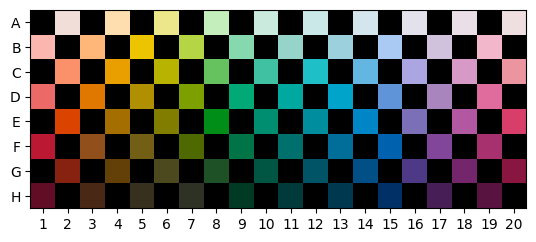

In [3]:
def plot_colors(color_column):
    fig, ax = plt.subplots()
    for idx, row in df.iterrows():
        ax.add_patch(plt.Rectangle((row['x'] - 0.5, row['y'] - 0.5), 1, 1, color=row[color_column], linewidth=0))

    ax.set_xlim(0.5, 20.5)
    ax.set_ylim(0.5, 8.5)
    ax.set_aspect('equal')
    ax.set_facecolor('black')
    ax.set_xticks(range(1, 21))
    ax.set_yticks(range(1, 9), ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])

plot_colors('tile_hex')

We can also use this function to plot the most common name in each language for each color chip.

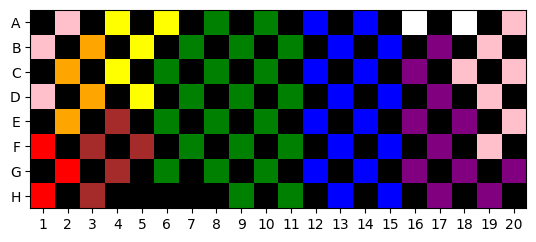

In [4]:
# Also try 'spanish_color' and 'tsimane_color'
plot_colors('english_color')

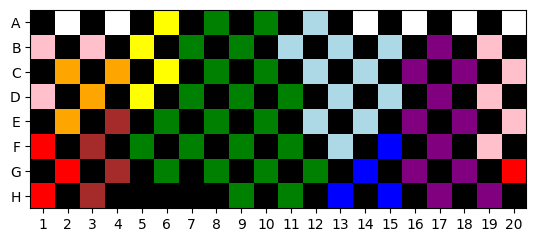

In [6]:
plot_colors('spanish_color')

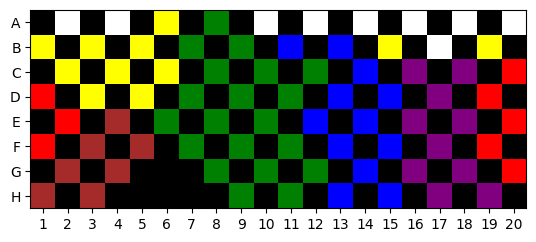

In [7]:
plot_colors('tsimane_color')

### Project Ideas:

- For each language, calculate what percentage of chips are named each color. Return dataframes for each language.

- Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.

- Is there a correlation between languages? Create scatter plots. 
	- Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.
	
	- You might need to `merge` dataframes.


In [29]:
# For each language, calculate what percentage of chips are named each color.
# Return dataframes for each language.

# English
english = df['english_color'].value_counts().reset_index()
english.columns = ['color', 'count']
english['percentage'] = (english['count'] / len(df) * 100).round(2)
print("English:")
print(english)

# Spanish
spanish = df['spanish_color'].value_counts().reset_index()
spanish.columns = ['color', 'count']
spanish['percentage'] = (spanish['count'] / len(df) * 100).round(2)
print("\nSpanish:")
print(spanish)

# Tsimane
tsimane = df['tsimane_color'].value_counts().reset_index()
tsimane.columns = ['color', 'count']
tsimane['percentage'] = (tsimane['count'] / len(df) * 100).round(2)
print("\nTsimane:")
print(tsimane)

English:
    color  count  percentage
0   green     22       27.50
1    blue     16       20.00
2  purple     11       13.75
3    pink     10       12.50
4   brown      5        6.25
5  yellow      5        6.25
6  orange      4        5.00
7     red      3        3.75
8   black      2        2.50
9   white      2        2.50

Spanish:
        color  count  percentage
0       green     22       27.50
1   lightblue     11       13.75
2      purple     11       13.75
3        pink      8       10.00
4       white      6        7.50
5         red      4        5.00
6      orange      4        5.00
7       brown      4        5.00
8      yellow      4        5.00
9        blue      4        5.00
10      black      2        2.50

Tsimane:
    color  count  percentage
0   green     20       25.00
1    blue     12       15.00
2  yellow     11       13.75
3  purple     10       12.50
4   white      9       11.25
5     red      8       10.00
6   brown      7        8.75
7   black      3        

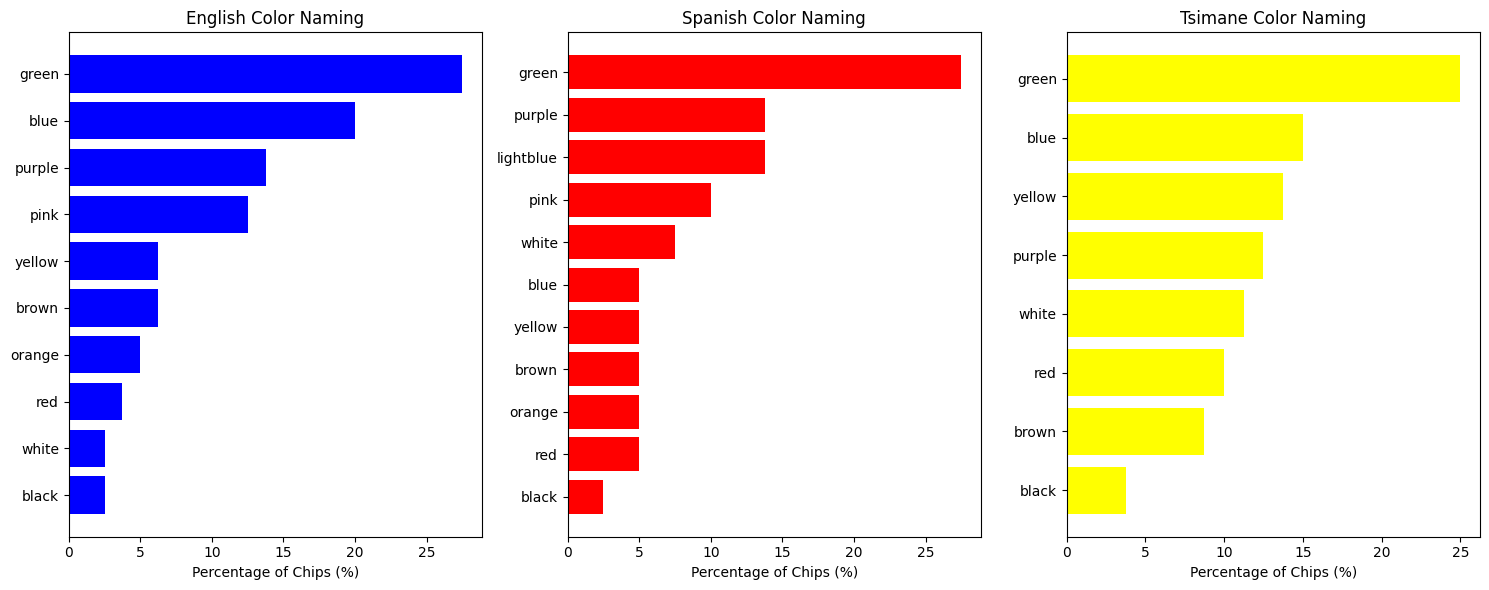

In [30]:
# Create a horizontal bar plot for each language.
# Each bar represents a color name and the length encodes the percentage of chips that are named that color.
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# English bar plot
english = english.sort_values('percentage', ascending=True)
axes[0].barh(english['color'], english['percentage'], color="blue")
axes[0].set_xlabel('Percentage of Chips (%)')
axes[0].set_title('English Color Naming')

# Spanish bar plot
spanish = spanish.sort_values('percentage', ascending=True)
axes[1].barh(spanish['color'], spanish['percentage'], color='red')
axes[1].set_xlabel('Percentage of Chips (%)')
axes[1].set_title('Spanish Color Naming')

# Tsimane bar plot
tsimane = tsimane.sort_values('percentage', ascending=True)
axes[2].barh(tsimane['color'], tsimane['percentage'], color='yellow')
axes[2].set_xlabel('Percentage of Chips (%)')
axes[2].set_title('Tsimane Color Naming')

plt.tight_layout()
plt.show()

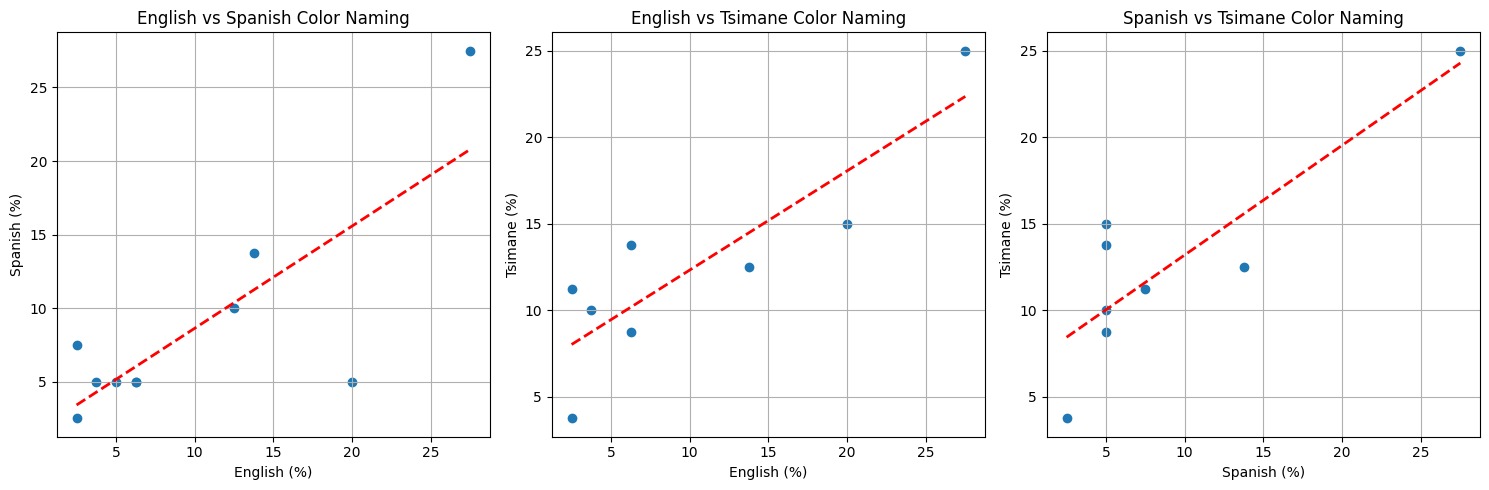

In [ ]:
# Is there a correlation between languages? Create scatter plots. 
# Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.
# You might need to `merge` dataframes.

import numpy as np

# Merge English and Spanish
english_spanish = english.merge(spanish, on='color', suffixes=('_eng', '_spa'))

# Merge English and Tsimane
english_tsimane = english.merge(tsimane, on='color', suffixes=('_eng', '_tsi'))

# Merge Spanish and Tsimane
spanish_tsimane = spanish.merge(tsimane, on='color', suffixes=('_spa', '_tsi'))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# English vs Spanish
axes[0].scatter(english_spanish['percentage_eng'], english_spanish['percentage_spa'])
# z is the coefficient
z = np.polyfit(english_spanish['percentage_eng'], english_spanish['percentage_spa'], 1)
# p is a func to calc y-vals for any x-vals; p(x)
p = np.poly1d(z)
axes[0].plot(english_spanish['percentage_eng'], p(english_spanish['percentage_eng']), "r--", linewidth=2)
axes[0].set_xlabel('English (%)')
axes[0].set_ylabel('Spanish (%)')
axes[0].set_title('English vs Spanish Color Naming')
axes[0].grid(True)

# English vs Tsimane
axes[1].scatter(english_tsimane['percentage_eng'], english_tsimane['percentage_tsi'])
z = np.polyfit(english_tsimane['percentage_eng'], english_tsimane['percentage_tsi'], 1)
p = np.poly1d(z)
axes[1].plot(english_tsimane['percentage_eng'], p(english_tsimane['percentage_eng']), "r--", linewidth=2)
axes[1].set_xlabel('English (%)')
axes[1].set_ylabel('Tsimane (%)')
axes[1].set_title('English vs Tsimane Color Naming')
axes[1].grid(True)

# Spanish vs Tsimane
axes[2].scatter(spanish_tsimane['percentage_spa'], spanish_tsimane['percentage_tsi'])
z = np.polyfit(spanish_tsimane['percentage_spa'], spanish_tsimane['percentage_tsi'], 1)
p = np.poly1d(z)
axes[2].plot(spanish_tsimane['percentage_spa'], p(spanish_tsimane['percentage_spa']), "r--", linewidth=2)
axes[2].set_xlabel('Spanish (%)')
axes[2].set_ylabel('Tsimane (%)')
axes[2].set_title('Spanish vs Tsimane Color Naming')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# streng of correlation: axes[0] > axes[2] > axes[1]